In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, sparse

In [2]:
# Generate random basis vectors
np.random.seed(4)
size = 4
a1 = np.random.random((size,1)) + 1j*np.random.random((size,1))
a2 = np.random.random((size,1)) + 1j*np.random.random((size,1))
a3 = np.random.random((size,1)) + 1j*np.random.random((size,1))
a4 = np.random.random((size,1)) + 1j*np.random.random((size,1))
basis = [a1, a2, a3, a4]

# Create the overlap matrix
S = np.zeros((size, size), dtype=complex)
for i in range(size):
    for j in range(size):
        S[i][j] = basis[i].conj().T @ basis[j]

In [3]:
S

array([[4.17835742+0.j        , 2.36028982+0.92644918j,
        2.2294425 +2.18626641j, 2.03405879+1.39183959j],
       [2.36028982-0.92644918j, 2.99504722+0.j        ,
        2.34979552+0.34044465j, 2.25891221+0.53799961j],
       [2.2294425 -2.18626641j, 2.34979552-0.34044465j,
        3.5261692 +0.j        , 2.15252033+0.32019589j],
       [2.03405879-1.39183959j, 2.25891221-0.53799961j,
        2.15252033-0.32019589j, 2.28711108+0.j        ]])

In [4]:
# Check the S[0][1] element to make sure dot product was preformed correctly
test_sum = 0
for i in range(size):
    test_sum += a1[i][0].conj()*a2[i][0]
    
if np.allclose(S[0][1],test_sum):
    print("Good")

Good


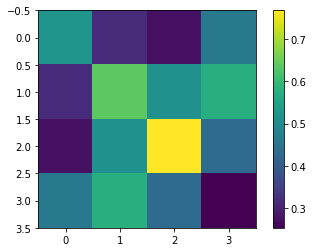

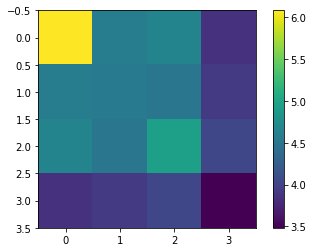

In [5]:
# Generate a random Hamiltonian in the orthonormal basis
h = np.random.random((size, size)) + 1j* np.random.random((size, size))
h += h.conj().T
h /= 2

# Now use the basis vectors to calculate <i|H|j>
H = np.zeros((size, size), dtype=complex)
for i in range(size):
    for j in range(size):
        H[i][j] = basis[i].conj().T @ h @ basis[j]
        
# Imshow plot both for ease of viewing
plt.figure(1)
plt.imshow(h.real)
plt.colorbar()

plt.figure(2)
plt.imshow(H.real)
plt.colorbar()

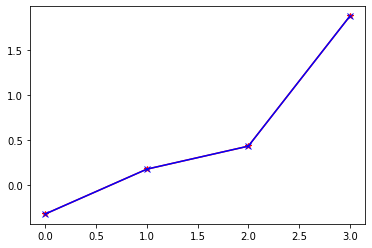

In [6]:
plt.plot(linalg.eigvalsh(h), 'r*-')
plt.plot(linalg.eigvalsh(H,S), 'bx-')

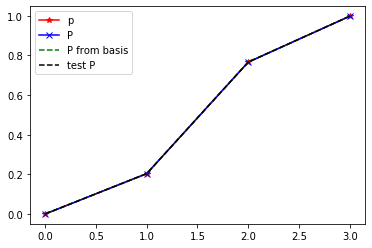

In [20]:
# Define constants for calculating p and P
mu = 0.3
beta = 10

# Define functions for the Fermi-Dirac distribution in orthonormal and non-orthonormal bases
def fd(h, beta, mu):
    e, v = linalg.eigh(h)
    v_inv = linalg.inv(v)
    p = 1/(1+np.exp(beta*(e-mu)))
    return v @ np.diag(p) @ v.conj().T, p

def no_FD(H, S, beta, mu):
    E, v = linalg.eigh(H, S)
    v_inv = linalg.inv(v)
    P = 1/(1+np.exp(beta*(E-mu)))
    return S @ v  @ np.diag(P) @ v.conj().T @ S, P

# Calculate p (i.e. the density matrix in the orthonormal basis)
p, eig_p = fd(h, beta, mu)

# Calculate P (i.e. the density matrix in the non-orthonormal basis)
P, eig_P = no_FD(H, S, beta, mu)

# Use the basis vectors to calculate P directly from p
P_from_basis = np.zeros((size, size), dtype=complex)
for i in range(size):
    for j in range(size):
        P_from_basis[i][j] = basis[i].conj().T @ p @ basis[j]

s_inv = linalg.inv(S)
test_P = S @ linalg.funm(s_inv @ H, lambda _: 1/(1+np.exp(beta*(_-mu)))) 

# Plot the eigenvalues of p and P
plt.plot(linalg.eigvalsh(p), 'r*-', label="p")
plt.plot(linalg.eigvalsh(P, S), 'bx-', label="P")
plt.plot(linalg.eigvalsh(P_from_basis, S), 'g--', label="P from basis")
plt.plot(linalg.eigvalsh(test_P, S), 'k--', label="test P")
plt.legend(numpoints=1)

In [8]:
E, V = linalg.eigh(H,S)
print(np.allclose(H @ V - S @ V @ np.diag(E), np.zeros((size, size), dtype=complex)))

True


In [9]:
e, v = linalg.eigh(h)
print(np.allclose(h @ v - v @ np.diag(e), np.zeros((size, size), dtype=complex)))

True


In [10]:
v_inv = linalg.inv(v)
print(np.allclose(v_inv @ h @ v, np.diag(e)))

True
